In [2]:
import pickle

In [4]:
data = pickle.load( open( "data/emotype_v5.p", "rb" ) ) 

In [5]:
len(data)

3153

In [6]:
data[0].keys()

dict_keys(['label', 'prediction', 'text', 'encoding', 'outputs'])

In [7]:
type(data[0]['encoding'])

numpy.ndarray

In [8]:
data[0]['encoding'].shape

(1, 256)

In [17]:
data[2500]['text']

"Have a refill on my xanax and am about to go fill it. Would this be any kind of red flag for my pain appointment on Thursday AM? (120x10 oxy)Just use the Xanax for sleep. I've had it, just not sure if he hasn't noticed because I don't fill it often at all really"

In [15]:
data[2500]['label']

'addiction'

In [16]:
data[2500]['prediction']

'addiction'

In [28]:
data[2500]['outputs'].shape # mispelled outputs, they are the output scores of the neural network before the softmax

(1, 8)

In [22]:
import numpy as np

In [33]:
embeddings = np.zeros((len(data), data[0]['encoding'].shape[1]))
outputs = np.zeros((len(data), data[0]['outputs'].shape[1]))
labels = [None] * len(data)
predictions = [None] * len(data)
text = [None] * len(data)

In [34]:
len(data)

3153

In [35]:
for k in data.keys():
    embeddings[k, :] = data[k]['encoding']
    labels[k] = data[k]['label']
    text[k] = data[k]['text']

# labels = np.array(labels)
# text = np.array()

In [53]:
# http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_fa_model_selection.html
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

n_components = np.arange(0, 50, 1)

def compute_scores(X):
    pca = PCA(svd_solver='full')
    fa = FactorAnalysis()

    pca_scores, fa_scores = [], []
    for n in n_components:
        if n % 10 == 0:
            print("Running dimensionality reduction for {} components...".format(n))
        pca.n_components = n
        fa.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X)))
        fa_scores.append(np.mean(cross_val_score(fa, X)))

    return pca_scores, fa_scores

pca_scores, fa_scores = compute_scores(embeddings)
n_components_pca = n_components[np.argmax(pca_scores)]
n_components_fa = n_components[np.argmax(fa_scores)]

pca = PCA(svd_solver='full', n_components='mle')
pca.fit(embeddings)
n_components_pca_mle = pca.n_components_

print("best n_components by PCA CV = %d" % n_components_pca)
print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
print("best n_components by PCA MLE = %d" % n_components_pca_mle)

Running dimensionality reduction for 0 components...
Running dimensionality reduction for 10 components...
Running dimensionality reduction for 20 components...
Running dimensionality reduction for 30 components...
Running dimensionality reduction for 40 components...
best n_components by PCA CV = 26
best n_components by FactorAnalysis CV = 7
best n_components by PCA MLE = 254


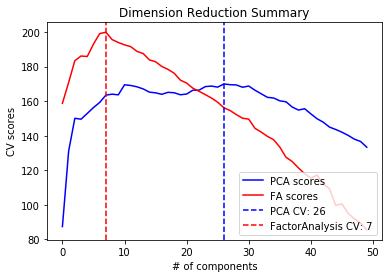

In [54]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(n_components, pca_scores, 'b', label='PCA scores')
plt.plot(n_components, fa_scores, 'r', label='FA scores')
plt.axvline(n_components_pca, color='b',
            label='PCA CV: %d' % n_components_pca, linestyle='--')
plt.axvline(n_components_fa, color='r',
            label='FactorAnalysis CV: %d' % n_components_fa,
            linestyle='--')
# plt.axvline(n_components_pca_mle, color='k',
#             label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')

plt.xlabel('# of components')
plt.ylabel('CV scores')
plt.legend(loc='lower right')
plt.title('Dimension Reduction Summary')

plt.show()

In [67]:
embeddings_fa = FactorAnalysis(n_components=n_components_fa, max_iter=20)
embeddings_fa.fit(embeddings)
embeddings_fa_scores = embeddings_fa.transform(embeddings)

In [81]:
labels_array = np.array(labels)  # dtype='<U13'
np.unique(np.array(labels))  # Addiction, Anxiety, Autism, Bipolar, Conversation, Depression, Happy, Schizophrenia

array(['addiction', 'anxiety', 'autism', 'bipolar', 'conversation',
       'depression', 'happy', 'schizophrenia'], dtype='<U13')

In [94]:
from sklearn.manifold import TSNE
embeddings_tsne = TSNE(n_components=2, verbose=1)
embeddings_tsne_scores = embeddings_tsne.fit_transform(embeddings_fa_scores)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3153 samples in 0.001s...
[t-SNE] Computed neighbors for 3153 samples in 0.158s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3153
[t-SNE] Computed conditional probabilities for sample 2000 / 3153
[t-SNE] Computed conditional probabilities for sample 3000 / 3153
[t-SNE] Computed conditional probabilities for sample 3153 / 3153
[t-SNE] Mean sigma: 0.678980
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.122253
[t-SNE] Error after 1000 iterations: 2.129691


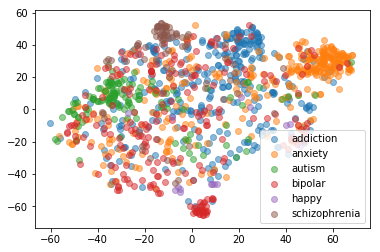

In [105]:
fig, ax = plt.subplots()
# for y in ['addiction', 'anxiety', 'depression']:
for y in np.unique(labels):
    if y == 'depression' or y == 'conversation':
        continue
    ax.scatter(embeddings_tsne_scores[labels_array == y, 0],
               embeddings_tsne_scores[labels_array == y, 1], 
               label = y,
               alpha=0.5)
ax.legend()
plt.show()

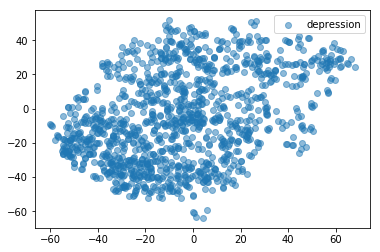

In [97]:
plt.scatter(embeddings_tsne_scores[labels_array == 'depression', 0],
               embeddings_tsne_scores[labels_array == 'depression', 1], 
               label = 'depression',
               alpha=0.5)
plt.legend()
plt.show()

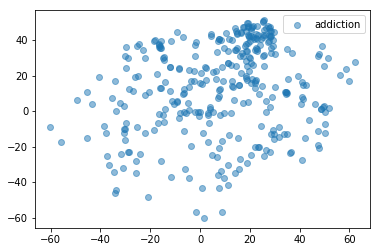

In [101]:
plt.scatter(embeddings_tsne_scores[labels_array == 'addiction', 0],
               embeddings_tsne_scores[labels_array == 'addiction', 1], 
               label = 'addiction',
               alpha=0.5)
plt.legend()
plt.show()

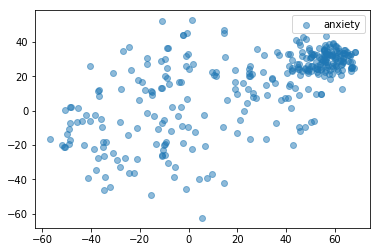

In [98]:
plt.scatter(embeddings_tsne_scores[labels_array == 'anxiety', 0],
               embeddings_tsne_scores[labels_array == 'anxiety', 1], 
               label = 'anxiety',
               alpha=0.5)
plt.legend()
plt.show()

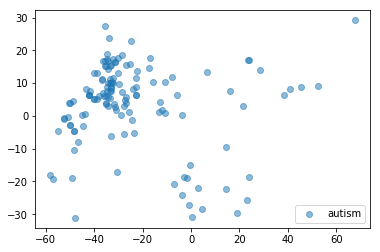

In [99]:
plt.scatter(embeddings_tsne_scores[labels_array == 'autism', 0],
               embeddings_tsne_scores[labels_array == 'autism', 1], 
               label = 'autism',
               alpha=0.5)
plt.legend()
plt.show()

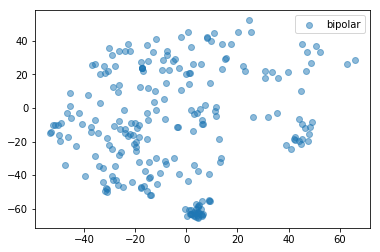

In [100]:
plt.scatter(embeddings_tsne_scores[labels_array == 'bipolar', 0],
               embeddings_tsne_scores[labels_array == 'bipolar', 1], 
               label = 'bipolar',
               alpha=0.5)
plt.legend()
plt.show()

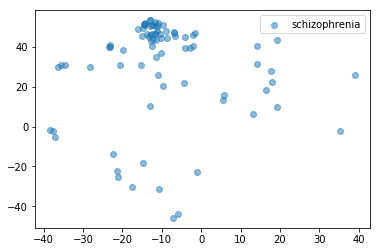

In [103]:
plt.scatter(embeddings_tsne_scores[labels_array == 'schizophrenia', 0],
               embeddings_tsne_scores[labels_array == 'schizophrenia', 1], 
               label = 'schizophrenia',
               alpha=0.5)
plt.legend()
plt.show()